<a href="https://colab.research.google.com/github/nkilm/world-happiness-report/blob/master/datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Datathon 2.0</center>

<div>
    <p>Team <strong>Codebakers</strong><br>
    <ul>
        <li>Nikhil Mohite - PES1UG20CS667</li>
        <li>Hithesh Patel - PES1UG20CS166</li>
    </ul>
</p>
</div>

## Dataset - **`World Happiness Report`**😄

<div>  
<h3><center style="background-color:#C39BD3; color:white;padding:10px 0"><strong>Importing Libraries 📚</strong></center></h3>
</div>

In [ ]:
# !pip install eli5
# !pip install geopandas 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import eli5
import geopandas # world map
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from eli5.sklearn import PermutationImportance
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Permutation importance and Prediction
from sklearn.ensemble import ExtraTreesRegressor # for Feature Importance

from google.colab import drive
# Import .csv files from Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div>  
<h3><center><strong>Loading Datasets⚙<div><div><div></strong></center></h3>
</div>

In [ ]:
df5=pd.read_csv(r'/content/drive/MyDrive/datathon2/2015.csv',encoding='utf8') # 2015
df4=pd.read_csv(r'/content/drive/MyDrive/datathon2/2016.csv',encoding='utf8') # 2016
df1=pd.read_csv(r'/content/drive/MyDrive/datathon2/2017.csv',encoding='utf8') # 2017
df2=pd.read_csv(r'/content/drive/MyDrive/datathon2/2018.csv',encoding='utf8') # 2018
df3=pd.read_csv(r'/content/drive/MyDrive/datathon2/2019.csv',encoding='utf8') # 2019

In [ ]:
df4.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [ ]:
df1.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [ ]:
df2.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [ ]:
df3.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [ ]:
print(f"Shape of Dataset 4(2016) is {df4.shape}")
print(f"Shape of Dataset 1(2017) is {df1.shape}")
print(f"Shape of Dataset 2(2018) is {df2.shape}")
print(f"Shape of Dataset 3(2019) is {df3.shape}")

Shape of Dataset 4(2016) is (157, 13)
Shape of Dataset 1(2017) is (155, 12)
Shape of Dataset 2(2018) is (156, 9)
Shape of Dataset 3(2019) is (156, 9)


In [ ]:
print(df4.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosi

In [ ]:
df3.describe

<bound method NDFrame.describe of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986   

<div>  
<h1><center><strong>Data Preprocessing</strong></center></h1>
</div>

In [ ]:
# Renaming the columns according to convention

df4 = df4.rename(columns={
    "Happiness Score" : "Score",
    "Family" : "social_support",
    "Economy (GDP per Capita)":"gdp_per_capita",
    "Freedom" : "freedom_to_make_life_choices",
    "Health (Life Expectancy)" : "healthy_life_expectancy",
    "Trust (Government Corruption)": "perceptions_of_corruption"
})

df1 = df1.rename(columns={
    "Country": "country",
    "Family" : "social_support",
    "Happiness.Rank":"happiness_rank",
    "Happiness.Score" : "Score",
    "Economy..GDP.per.Capita.": "gdp_per_capita",
    "Freedom" : "freedom_to_make_life_choices",
    "Health..Life.Expectancy.": "healthy_life_expectancy",
    "Trust..Government.Corruption." : "perceptions_of_corruption",
})

df2 = df2.rename(columns={
    "Overall rank": "overall_rank",
    "Country or region":"country_or_region",
    "GDP per capita":"gdp_per_capita",
    "Social support":"social_support",
    "Healthy life expectancy": "healthy_life_expectancy",
    "Freedom to make life choices":"freedom_to_make_life_choices",
    "Perceptions of corruption": "perceptions_of_corruption"
})

df3 = df3.rename(columns={
    "Overall rank": "overall_rank",
    "Country or region":"country_or_region",
    "GDP per capita":"gdp_per_capita",
    "Social support":"social_support",
    "Healthy life expectancy": "healthy_life_expectancy",
    "Freedom to make life choices":"freedom_to_make_life_choices",
    "Perceptions of corruption": "perceptions_of_corruption"
})

print(df4.columns)
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['country', 'happiness_rank', 'Score', 'Whisker.high', 'Whisker.low',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'Generosity',
       'perceptions_of_corruption', 'Dystopia.Residual'],
      dtype='object')
Index(['overall_rank', 'country_or_region', 'Score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'Generosity',
       'perceptions_of_corruption'],
      dtype='object')
Index(['overall_rank', 'country_or_region', 'Score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', '

In [ ]:
# Adding percent chnage columns
df4["percent_change_in_score"]=((df4["Score"] - df5["Happiness Score"])/df5["Happiness Score"])*100 # 2016
df1["percent_change_in_score"]=((df1["Score"] - df4["Score"])/df4["Score"])*100 # 2017
df2["percent_change_in_score"]=((df2["Score"] - df1["Score"])/df1["Score"])*100 # 2018
df3["percent_change_in_score"]=((df3["Score"] - df2["Score"])/df2["Score"])*100 # 2019
df3["percent_change_in_life_expectancy"]=((df3["healthy_life_expectancy"] - df2["healthy_life_expectancy"])/df2["healthy_life_expectancy"])*100
df3["percent_change_in_gdp_per_capita"]=((df3["gdp_per_capita"] - df2["gdp_per_capita"])/df2["gdp_per_capita"])*100

<div>  
<h1><center><strong>Data Cleaning🧼</strong></center></h1>
</div>

In [ ]:
df4.isnull().sum() # No NaN found
df1.isnull().sum() # No NaN found
df3.isnull().sum() # No NaN found
df2.isnull().sum() # One value is null

overall_rank                    0
country_or_region               0
Score                           0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
Generosity                      0
perceptions_of_corruption       1
percent_change_in_score         1
dtype: int64

In [ ]:
# Where is the NaN value?
df2[df2["perceptions_of_corruption"].isna()]

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,1.834036


In [ ]:
# 2017
df1[df1.country=="United Arab Emirates"]

,country,happiness_rank,Score,Whisker.high,Whisker.low,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,Dystopia.Residual,percent_change_in_score
20,United Arab Emirates,21,6.648,6.722047,6.573952,1.626343,1.26641,0.726798,0.608345,0.360942,0.32449,1.734704,-1.917973


In [ ]:
# 2018
df2[df2.country_or_region=="United Arab Emirates"]

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,1.834036


In [ ]:
# 2019
df3[df3.country_or_region=="United Arab Emirates"]

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score,percent_change_in_life_expectancy,percent_change_in_gdp_per_capita
20,21,United Arab Emirates,6.825,1.503,1.31,0.825,0.598,0.262,0.182,1.698704,-3.395785,21.89781


**Replacing the NaN value with `Average of Corruption levels` from the year 2017 and 2019**

In [ ]:
corruption_value_2017=float(df1[df1.country=="United Arab Emirates"]["perceptions_of_corruption"])
corruption_value_2019=float(df3[df3.country_or_region=="United Arab Emirates"]["perceptions_of_corruption"])

avg_value = round((corruption_value_2017 + corruption_value_2019)/2,4)

df2.loc[df2.country_or_region=="United Arab Emirates","perceptions_of_corruption"] = avg_value

df2[df2.country_or_region=="United Arab Emirates"]

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.2532,1.834036


## Conclusions from Data Preprocessing and Cleaning
* **Only one NaN value** was found in 2018 dataset
* The NaN value found in column `Perceptions of corruption` belongs to `United Arab Emirates`

#### `Top 5 Countries in terms of GDP per capita and Trust in government`

In [ ]:
df3['gdp_x_trust'] = df3["gdp_per_capita"]*df3["perceptions_of_corruption"]
top_5 = df3.sort_values(by="gdp_x_trust",ascending=False).head(5)
top_5.loc[:,["overall_rank","country_or_region","Score","gdp_per_capita","perceptions_of_corruption"]]

,overall_rank,country_or_region,Score,gdp_per_capita,perceptions_of_corruption
33,34,Singapore,6.262,1.572,0.453
1,2,Denmark,7.600,1.383,0.410
0,1,Finland,7.769,1.340,0.393
6,7,Sweden,7.343,1.387,0.373
13,14,Luxembourg,7.090,1.609,0.316


In [ ]:
df2['gdp_x_trust'] = df2["gdp_per_capita"]*df2["perceptions_of_corruption"]
top_5 = df2.sort_values(by="gdp_x_trust",ascending=False).head(5)
top_5.loc[:,["overall_rank","country_or_region","Score","gdp_per_capita","perceptions_of_corruption"]]

,overall_rank,country_or_region,Score,gdp_per_capita,perceptions_of_corruption
33,34,Singapore,6.343,1.529,0.4570
2,3,Denmark,7.555,1.351,0.4080
19,20,United Arab Emirates,6.774,2.096,0.2532
8,9,Sweden,7.314,1.355,0.3830
0,1,Finland,7.632,1.305,0.3930


In [ ]:
df1['gdp_x_trust'] = df1["gdp_per_capita"]*df1["perceptions_of_corruption"]
top_5 = df1.sort_values(by="gdp_x_trust",ascending=False).head(5)
top_5
top_5.loc[:,["happiness_rank","country","Score","gdp_per_capita","perceptions_of_corruption"]]

,happiness_rank,country,Score,gdp_per_capita,perceptions_of_corruption
34,35,Qatar,6.375,1.870766,0.439299
25,26,Singapore,6.572,1.692278,0.464308
1,2,Denmark,7.522,1.482383,0.400770
8,9,Sweden,7.284,1.494387,0.384399
3,4,Switzerland,7.494,1.564980,0.367007


<div>  
<h1><center><strong>Data Visualization📊</strong></center></h1>
</div>

### <center>**Top 20 Countries** (based on Happiness Score)</center>

In [ ]:
top_20 = df3.head(20)
top_20

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score,percent_change_in_life_expectancy,percent_change_in_gdp_per_capita,gdp_x_trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1.795073,12.814645,2.681992,0.526620
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.079010,15.679443,-5.013736,0.567030
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,-0.013236,18.433180,10.140637,0.507408
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,-0.013342,12.253829,2.755026,0.162840
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.013356,7.766990,-1.690141,0.416008
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,0.524123,19.817768,6.686260,0.498036
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,0.204694,12.611607,4.285714,0.517351
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,-0.232114,17.123288,2.760252,0.495140
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,-0.492207,13.800657,0.738007,0.420420
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,-0.357536,11.648352,2.686567,0.310976


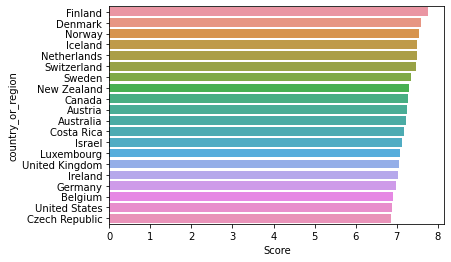

In [ ]:
sns.barplot(x="Score", y="country_or_region", data=top_20,orient='h')


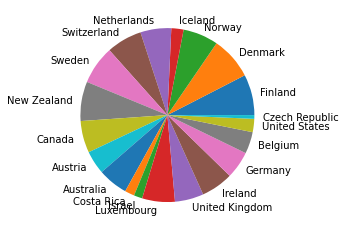

In [ ]:
plt.pie(top_20['perceptions_of_corruption'], labels = top_20["country_or_region"])
plt.show()

### **Inference**
* `Denmark`, `New Zealand` and `Finland` are having higher levels of corruption compared to other Countries
* `Czech Republic` comes out as having one lowest levels of corruption.

### <center>**Middle 20 Countries** (based on Happiness Score)</center>

In [ ]:
middle_20 = df3.iloc[80:100,:]
middle_20

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score,percent_change_in_life_expectancy,percent_change_in_gdp_per_capita,gdp_x_trust
80,81,Belarus,5.323,1.067,1.465,0.789,0.235,0.094,0.142,-0.448850,8.230453,4.916421,0.151514
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034,-0.638978,35.549525,5.919283,0.040154
82,83,Mongolia,5.285,0.948,1.531,0.667,0.317,0.235,0.038,-0.320634,8.631922,-3.462322,0.036024
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,-0.396601,21.979622,0.408580,0.033422
84,85,Nigeria,5.265,0.696,1.111,0.245,0.426,0.215,0.041,0.209364,-63.378176,-10.654685,0.028536
85,86,Kyrgyzstan,5.261,0.551,1.438,0.723,0.508,0.300,0.023,0.285932,-9.511890,-44.287159,0.012673
86,87,Turkmenistan,5.247,1.052,1.538,0.657,0.394,0.244,0.028,0.884445,8.955224,2.734375,0.029456
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,0.230814,31.270903,111.392405,0.114228
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,0.443587,13.169320,-16.475495,0.060876
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182,0.910676,19.224806,26.885645,0.189826


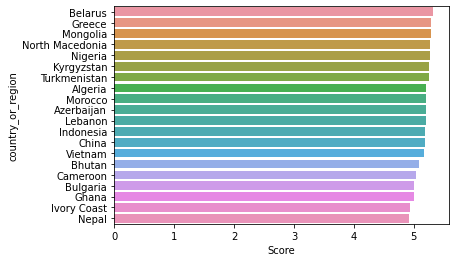

In [ ]:
sns.barplot(x="Score", y="country_or_region", data=middle_20,orient='h')

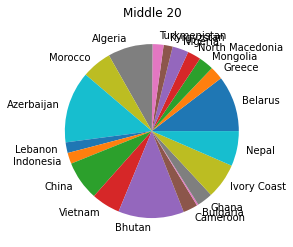

In [ ]:
plt.title("Middle 20")
plt.pie(middle_20['perceptions_of_corruption'], labels = middle_20["country_or_region"])
plt.show()

### <center>**Bottom 20 Countries** (based on Happiness Score)</center>

In [ ]:
bottom_20 = df3.tail(20)
bottom_20

,overall_rank,country_or_region,Score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,perceptions_of_corruption,percent_change_in_score,percent_change_in_life_expectancy,percent_change_in_gdp_per_capita,gdp_x_trust
136,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,0.067,0.652331,106.410256,50.909091,0.061171
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,0.097490,-30.049261,-27.112232,0.050286
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085,2.150538,62.055336,6.177606,0.023375
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,1.286579,178.672986,119.476744,0.064175
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,4.385504,460.759494,-84.533898,0.002409
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,4.690382,87.732342,-62.465753,0.021372
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041,4.213037,38.059701,4.580153,0.011234
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,2.979415,-32.258065,36.974790,0.045477
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180,3.937225,49.019608,-86.144578,0.008280
145,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089,2.033426,3.836930,-64.011799,0.032574


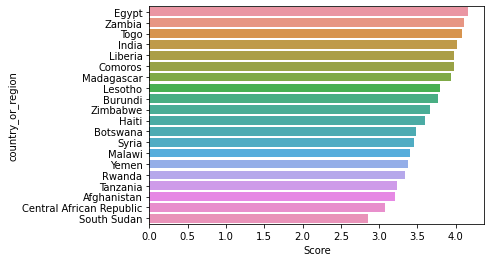

In [ ]:
sns.barplot(x="Score", y="country_or_region", data=bottom_20, orient='h')

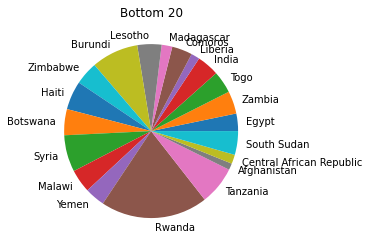

In [ ]:
plt.title("Bottom 20")
plt.pie(bottom_20['perceptions_of_corruption'], labels = bottom_20["country_or_region"])
plt.show()

## Comparison between Top 20 Countries and Bottom 20 Countries

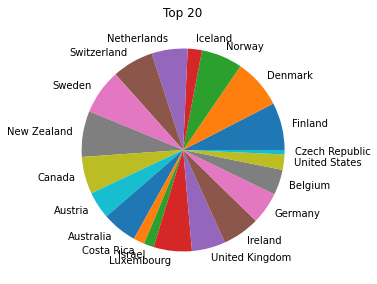

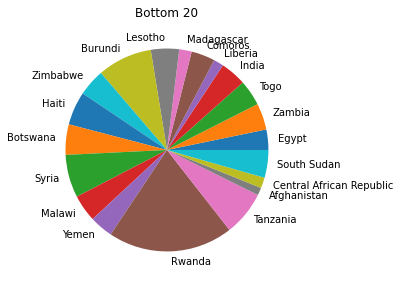

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(1, 2, 2)
plt.title("Top 20")
plt.pie(top_20['perceptions_of_corruption'], labels = top_20["country_or_region"])
plt.show()

plt.subplot(1, 2, 1)
plt.title("Bottom 20")
plt.pie(bottom_20['perceptions_of_corruption'], labels = bottom_20["country_or_region"])
plt.show()

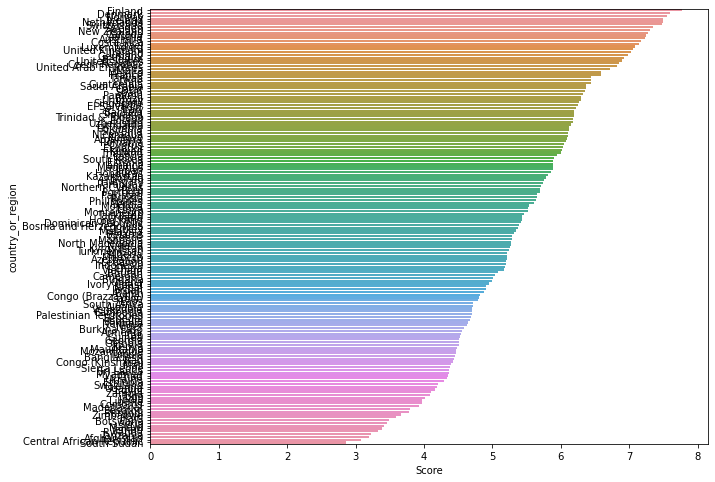

In [ ]:
# Overall 2019 dataset
sns.barplot(x="Score", y="country_or_region", data=df3, orient='h')

## Inference
* The `diference in Happiness Score` is very large for top and bottom countries, which can be observed in above graph
* `This difference in Happiness Score is affected by many features/factors.`
We'll use `correlation matrix/graph` to analyze further 

In [ ]:
# Which Countries have shown most positive change in score? 
df3.sort_values(by="percent_change_in_score",ascending=False).head(10).loc[:,["country_or_region","percent_change_in_score"]]

,country_or_region,percent_change_in_score
141,Comoros,4.690382
140,Liberia,4.385504
142,Madagascar,4.213037
144,Burundi,3.937225
132,Ukraine,3.389021
143,Lesotho,2.979415
133,Ethiopia,2.880461
131,Chad,2.473498
138,Togo,2.150538
116,Iran,2.064632


## `Comoros` and `Liberia` show highest increase in `Happiness Score`

In [ ]:
# Which Countries have shown most positive change in life expectancy? 
df3.sort_values(by="percent_change_in_life_expectancy",ascending=False).head(10).loc[:,["country_or_region","percent_change_in_score","percent_change_in_life_expectancy"]]

,country_or_region,percent_change_in_score,percent_change_in_life_expectancy
112,Namibia,1.487639,inf
90,Lebanon,0.814743,1597.916667
106,Albania,1.027617,992.500000
154,Central African Republic,0.000000,950.000000
130,Myanmar,1.371774,947.169811
140,Liberia,4.385504,460.759494
97,Ghana,0.281012,322.608696
139,India,1.286579,178.672986
117,Guinea,1.956375,146.710526
124,Bangladesh,1.804889,145.084746


In [ ]:
# Which Countries have shown most positive change in GDP per Capita? 
df3.sort_values(by="percent_change_in_gdp_per_capita",ascending=False).head(10).loc[:,["country_or_region","percent_change_in_score","percent_change_in_gdp_per_capita"]]

,country_or_region,percent_change_in_score,percent_change_in_gdp_per_capita
97,Ghana,0.281012,inf
148,Syria,-0.944206,714.473684
131,Chad,2.473498,407.246377
112,Namibia,1.487639,243.359375
155,South Sudan,-1.790017,236.263736
147,Botswana,-2.624232,230.476190
133,Ethiopia,2.880461,156.488550
134,Swaziland,1.225667,151.863354
139,India,1.286579,119.476744
87,Algeria,0.230814,111.392405


## <center>Interactive Graphs</center>

In [ ]:
fig = px.scatter(df3, x="Score", y="country_or_region", color="healthy_life_expectancy", )
fig.show()

### `Comparison between the year 2018 and 2019`

In [ ]:
# adding year column to df's
df2['year'] = '2018'
df3['year'] = '2019'
df_with_corres_year = pd.concat([df3,df2], axis=0, join='outer', ignore_index=False)
px.scatter(df_with_corres_year, x="Score", y="country_or_region",animation_frame="year", color="social_support")
# df_with_corres_year.head(3)

## <center>**Correlation Graph**</center>
<center>Which features are depending upon each other?</center>

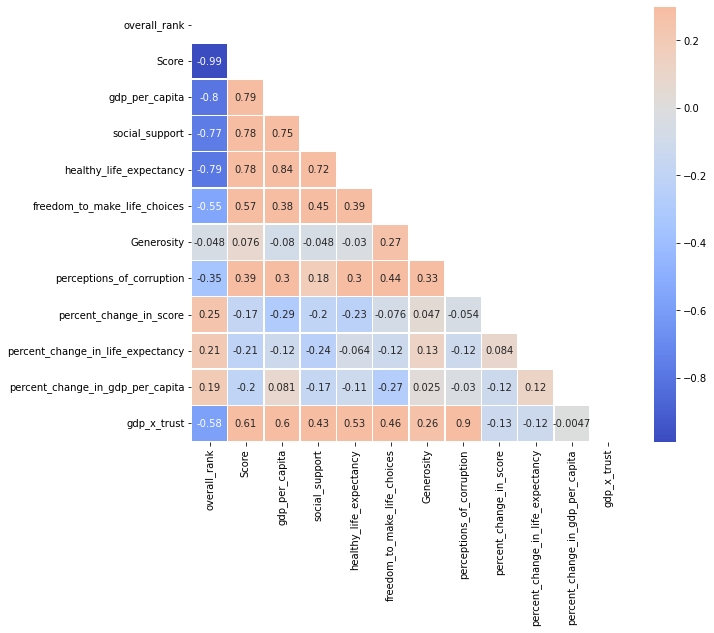

In [ ]:
# plt.figure(figsize=(20,30))
corr=df3.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5,annot=True)
plt.show()

## **Observations from Correlation Graph**

`Higher is the correlation value, the more dependent are the features upon one another`

* Since `Overall Rank` is determined based on `Happiness Score`, the correlation value is very high.
* The `Overall Rank` is affected by almost all features, except for `Generosity` which is having correlation value of nearly 0.

  (Check corresponding value of `Generosity` with `overall_rank`)


# <center> Scatter Plots showing relation b/w features</center>

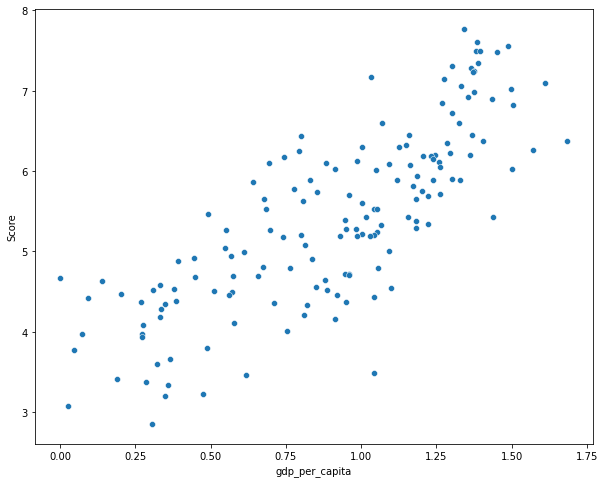

In [ ]:
sns.scatterplot(data=df3,x="gdp_per_capita",y="Score")

## Positive Correlation between `Score` and `gdp_per_capita` (r = 0.79) 

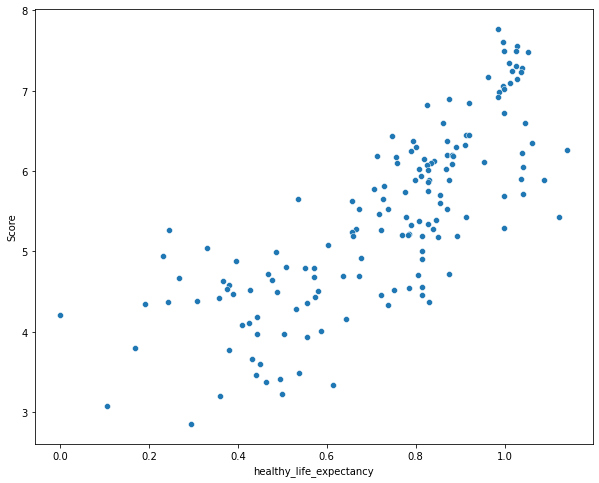

In [ ]:
sns.scatterplot(data=df3,x="healthy_life_expectancy",y="Score")

## Positive Correlation between `Score` and `healthy_life_expectancy` (r = 0.78) 

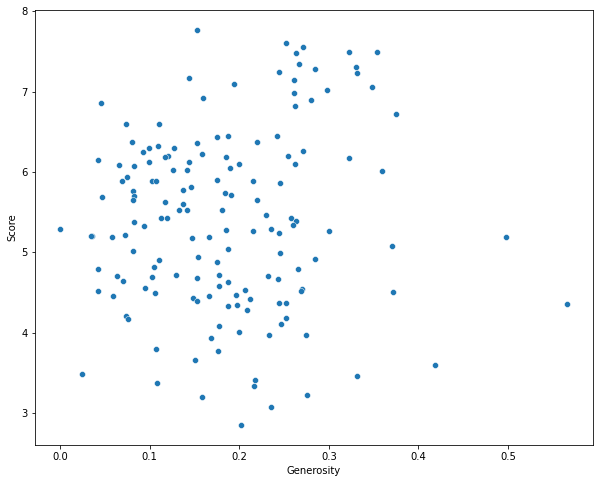

In [ ]:
sns.scatterplot(data=df3,x="Generosity",y="Score")

## No proper correlation between `Score` and `Generosity` (r=0.076)

### `Clearly from the above Scatter Plots we can validate the information obtained from correlation graph`

<h1><center>ROUND 2 - Feature Selection</center></h1>

**What we know till now?**
* From Correlation graph, we found out that **almost all the features were affecting `Happiness Score` except for `Generosity`**
* Plotting `Feature Importance` graph and `Permutation Table`, we'll get more insight into the matter.



# <center>Permutation Importance</center>
<center>Measuring variable importance</center>:

In [ ]:
features = [
            "gdp_per_capita",
            "social_support",
            "healthy_life_expectancy",
            "freedom_to_make_life_choices",
            "Generosity",
            "perceptions_of_corruption",
            "percent_change_in_score"
]
X = df3[features]
y = df3["Score"]

In [ ]:
# Splitting the data into testing and training 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)
permut = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(permut, feature_names = val_X.columns.tolist())

Weight,Feature
0.2763 ± 0.0786,social_support
0.1255 ± 0.0705,gdp_per_capita
0.0962 ± 0.0690,healthy_life_expectancy
0.0615 ± 0.0232,percent_change_in_score
0.0314 ± 0.0230,freedom_to_make_life_choices
-0.0054 ± 0.0163,Generosity
-0.0186 ± 0.0166,perceptions_of_corruption


## By analyzing the `Permutation Table`, we can say that the features (the one's with bg-green) are having higher importance when compared to others.


# <center> Feature Importance </center>

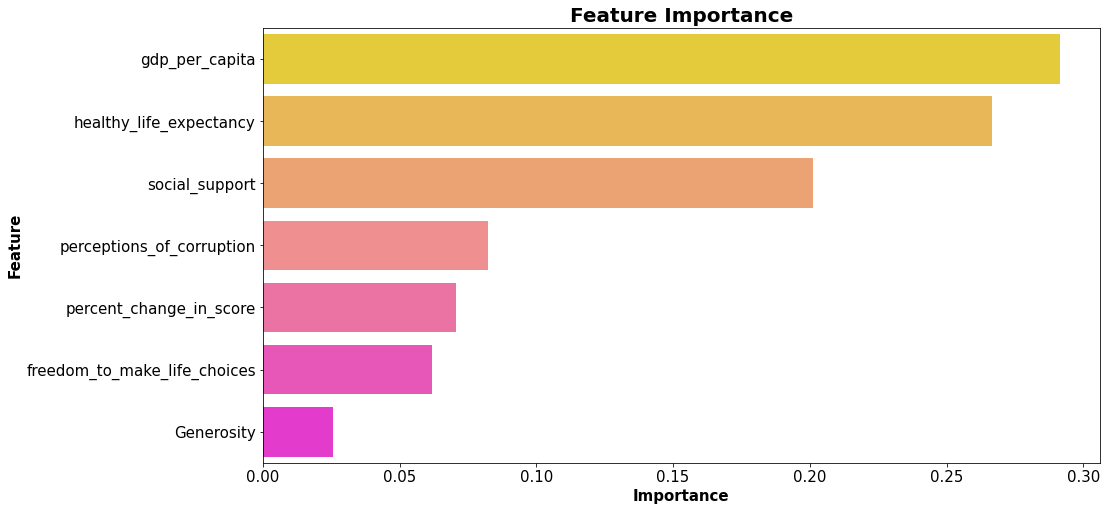

In [ ]:
model_tree_regr = ExtraTreesRegressor()
model_tree_regr.fit(train_X, train_y)
feature_importance = pd.DataFrame(model_tree_regr.feature_importances_,
             columns=['importance'])
feature_importance['feature'] = features
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(15, 8))

f_plot = sns.barplot(data=feature_importance, x='importance', y='feature',palette="spring_r")
f_plot.tick_params(axis='both', which='both', labelsize=15)
f_plot.set_xlabel('Importance',fontsize=15, weight="bold");
f_plot.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

## Analzing the other Dataset, to check if we get similar results

In [ ]:
features1 = [
            "social_support",
            "gdp_per_capita",
            "healthy_life_expectancy",
            "freedom_to_make_life_choices",
            "Generosity",
            "perceptions_of_corruption"
]
X1 = df2[features1]
y1 = df2["Score"]

train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y1, random_state=1)
model1 = RandomForestRegressor().fit(train_X1, train_y1)

permut1 = PermutationImportance(model1, random_state=1).fit(val_X1, val_y1)
eli5.show_weights(permut1, feature_names = val_X1.columns.tolist())

Weight,Feature
0.2473 ± 0.0809,gdp_per_capita
0.1474 ± 0.0878,social_support
0.1453 ± 0.0691,healthy_life_expectancy
0.0003 ± 0.0604,freedom_to_make_life_choices
-0.0031 ± 0.0132,Generosity
-0.0074 ± 0.0143,perceptions_of_corruption


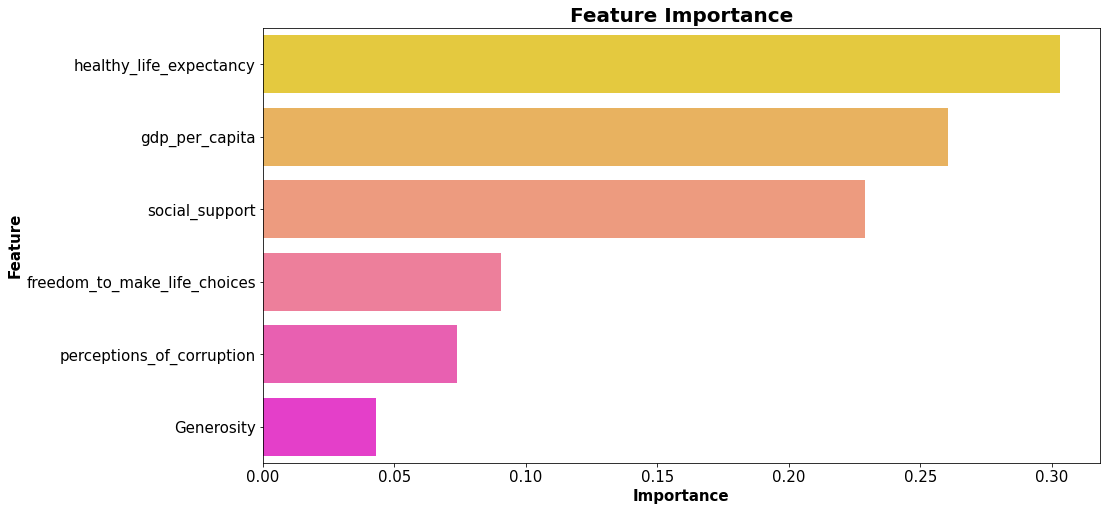

In [ ]:
model_tree_regr1 = ExtraTreesRegressor()
model_tree_regr1.fit(train_X1, train_y1)
feature_importance = pd.DataFrame(model_tree_regr1.feature_importances_,
             columns=['importance'])
feature_importance['feature'] = features1
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(15, 8))

f_plot = sns.barplot(data=feature_importance, x='importance', y='feature',palette="spring_r")
f_plot.tick_params(axis='both', which='both', labelsize=15)
f_plot.set_xlabel('Importance',fontsize=15, weight="bold");
f_plot.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

# <center>ROUND 3 - Prediction</center>

# <center>Model Training⚙</center>

In [ ]:
# Take Important features
features = [
            "Score",
            "gdp_per_capita",
            "social_support",
            "healthy_life_expectancy",
            "freedom_to_make_life_choices",
            "Generosity",
            "perceptions_of_corruption",
            "percent_change_in_score"
]

df_4 = df4[features]
df_1 = df1[features]
df_2 = df2[features]
df_3 = df3[features]


In [ ]:

data_frames = [df_4,df_1,df_2]

# Merging the dataset
merged_df = pd.concat(data_frames)

# merged_df.isnull().sum() # One NaN value found so drop

merged_df = merged_df[merged_df["percent_change_in_score"].notna()]
print(f"After merging the datasets, the shape is {merged_df.shape}")

After merging the datasets, the shape is (467, 8)


## Recommended Train-Test-Split
<br>

## `2016,2017,2018 is used for Training`
## `2019 is used for Testing`
<br>



In [ ]:
train_X = merged_df
train_y = merged_df["Score"]
val_X = df_3
val_y = df_3["Score"]

In [ ]:
# Multiple Linear Regr Model

def multiple_regr():
  regr = linear_model.LinearRegression()
  regr.fit(train_X, train_y)
  predicted = regr.predict(val_X)
  mae = mean_absolute_error(val_y, predicted)
  mse = mean_squared_error(val_y,predicted)
  r2 = r2_score(val_y, predicted)
  print(f"Multiple Linear Regression\nMean Absolute Error - {mae}\nMean Squared Error - {mse}\nAccuracy - {round(r2*100,5)}%\n")

In [ ]:
multiple_regr()

Multiple Linear Regression
Mean Absolute Error - 7.54382311604273e-16
Mean Squared Error - 1.1744419566511538e-30
Accuracy - 100.0%



In [ ]:
def model_name(model,name):
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    mse = mean_squared_error(val_y,predictions)
    r2 = r2_score(val_y, predictions)
    print(f"{name}\nMean Absolute Error - {mae}\nMean Squared Error - {mse}\nAccuracy - {round(r2*100,5)}%\n")

In [ ]:
model_name(DecisionTreeRegressor(),"Decision Tree Regressor")
model_name(RandomForestRegressor(),"Random Forest Regressor")

Decision Tree Regressor
Mean Absolute Error - 0.015910257308911133
Mean Squared Error - 0.0007937437236787381
Accuracy - 99.93553%

Random Forest Regressor
Mean Absolute Error - 0.010052689548302851
Mean Squared Error - 0.0005988162569525915
Accuracy - 99.95136%



# Conclusion 
* All the 3 model(s) i.e, Multiple Linear Regression, Decision Tree Regr, Random Forest Regr, are `working with very good accuracy.` 
* The `Model(s)` present in this project are `proof for our hypothesis` that the important `features selected at the end of Round 2 were True.`
* REPORT - <br> 
[final_report.pdf](https://drive.google.com/file/d/1M9v0ACoPpAFlOJzGYRp14XhPnUYb5Jkj/view?usp=sharing)


* Datasets with report: <br>
https://drive.google.com/drive/folders/1EeN2RrwGfjGvdUvsO74QaEPYXQEX-xKq?usp=sharing


## `Suggested` - Visualization of `Happiness Scores` on `World Map`
##### `using geopandas`
##### `folim` library can also be used to display data geographically

### Adding `latitude` and `longitude`

In [ ]:
df_2019 = df3.loc[:,["overall_rank","country_or_region","gdp_per_capita","healthy_life_expectancy","freedom_to_make_life_choices"]]

# Uncomment the below code to recreate the .csv file 

# import geopy
# from geopy.geocoders import Nominatim
# geopy.geocoders.options.default_user_agent = "nikhil.2002.coc@gmail.com"

# geolocator = Nominatim()

# df_2019 = df_2019.set_index('country_or_region')

# def geolocate(country):
#     try:
# #         print(country)
#         # Geolocate the center of the country
#         loc = geolocator.geocode(country)
#         return (loc.latitude, loc.longitude)
#     except:
#         # Return False
#         return False
    
# df_2019["latitude"] = np.nan
# df_2019["longitude"] = np.nan

# for country in df_2019.index:
#     res = geolocate(country)
#     if res!=False:
#         df_2019.loc[[country],"latitude"] = res[0]
#         df_2019.loc[[country],"longitude"] = res[1]

# df_2019.to_csv("2019_with_coordinates.csv", encoding='utf-8')

In [ ]:
df_2019 = pd.read_csv(r'/content/drive/MyDrive/datathon2/2019_with_coordinates.csv',encoding='utf8')

import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(df_2019)):
        lat = df_2019.iloc[i]['latitude']
        long = df_2019.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}
                    Happiness Score: {}<br>"""
        popup_text = popup_text.format(df_2019.iloc[i]['country_or_region'],
                                   df_2019.iloc[i]['overall_rank']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map